In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

In [ ]:
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense, Input

In [ ]:
import time

# Keras DNN 최소 코드


## 데이터 준비
1차원 데이터 x와 x**2의 1차원 데이타 y

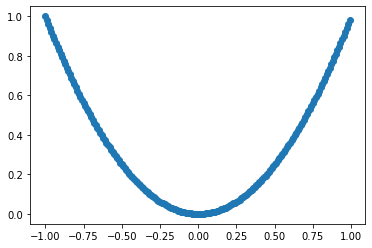

In [ ]:
x = np.arange(-1,1,0.01)
y = x**2

plt.scatter(x,y)

In [ ]:
print(len(x))
print(x.shape)

200
(200,)


## 최소 코드
아래의 코드는 최소 코드

In [ ]:
# 모델 정의
model = keras.Sequential()
model.add(Input(1)) # 입력
model.add(Dense(10, activation='tanh')) # 퍼셉트론 개수
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))

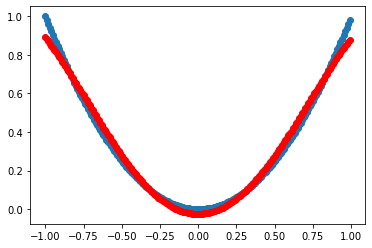

In [ ]:
# 컴파일 : 모델 + optimizer + loss
model.compile(optimizer="SGD", loss="mse")

# 학습
model.fit(x, y, epochs=1000, verbose=0, batch_size=20)

# 예측
y_ = model.predict(x)

# 결과 그래프로 보기
plt.scatter(x,y) # 정답
plt.scatter(x,y_,color='r') # 결과
plt.show()

## Keras DNN 최소 코드에 기본 추가
최소는 아니고, 이정도는 매번 사용하는 코드

## model.evaluate() - 성능 평가하기

7/7 [==============================] - 0s 3ms/step - loss: 7.7426e-04 - mae: 0.0230
loss= 0.0007742603775113821
mae= 0.02301918901503086


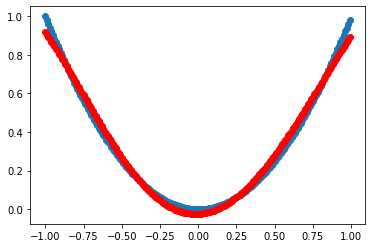

In [ ]:
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense


model = keras.Sequential()
model.add(Input(1))
model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='tanh' ))
model.add(Dense(1))


# metrics 추가 (성능평가 지표)
model.compile(optimizer="SGD", loss="mse", metrics=["mae"])

# verbose=0는 밑에 학습하는 모습이 안뜨게 해줌
model.fit(x, y, epochs=1000, verbose=0, batch_size=20)

# 모델 평가 추가
loss, mae = model.evaluate(x, y) 
# loss값 출력 추가
print("loss=", loss) 
# mae값 출력 추가
print("mae=", mae) 


y_ = model.predict(x)


plt.scatter(x,y)   # 정답 파랑
plt.scatter(x,y_,color='r')  # 예측값 빨강
plt.show()

출력에 loss와 mae가 추가되었다.

## 데이터 나누기 (train, test)
test데이터로 평가

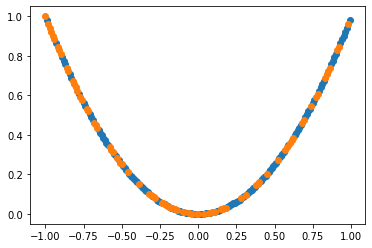

In [ ]:
x = np.arange(-1,1,0.01)
np.random.shuffle(x)
y = x**2

# train, test 데이터 6:4로 나누기
split_index = int(x.shape[0]*0.6)

train_x, test_x = x[:split_index], x[split_index:]
train_y, test_y = y[:split_index], y[split_index:]

plt.scatter(train_x,train_y)
plt.scatter(test_x,test_y)
plt.show()

### test데이터로 평가

3/3 [==============================] - 0s 5ms/step - loss: 0.0020 - mae: 0.0349
loss= 0.0020108118187636137
mae= 0.034886278212070465


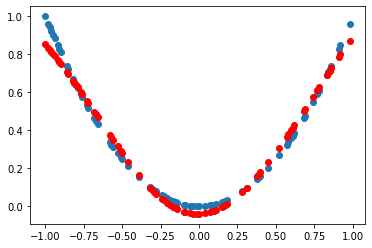

In [ ]:
# 바뀐 x, y값 확인
model = keras.Sequential()
model.add(Input(1))
model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))

model.compile(optimizer="SGD", loss="mse", metrics=["mae"])

# model.fit(x, y, epochs=1000, verbose=0, batch_size=20)
model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)

# loss, mae = model.evaluate(x, y)
loss, mae = model.evaluate(test_x, test_y)
print("loss=", loss)
print("mae=", mae)

# y_ = model.predict(x)
y_ = model.predict(test_x)

# plt.scatter(x,y)
plt.scatter(test_x,test_y)
# plt.scatter(x,y_,color='r')
plt.scatter(test_x,y_,color='r')
plt.show()

train_x, train_y로 학습하였고, evaluate()와 predict()에는 test_x, test_y를 사용

그려진 그림을 보면 test_x의 점사이에 빈 간격이 보인다. 그 간격이 train_x에 해당

### Base Model 결과 저장 (test data)
이후 비교를 위해 그래프를 저장

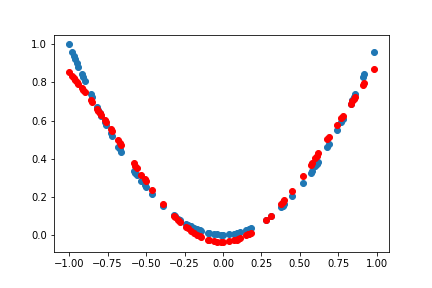

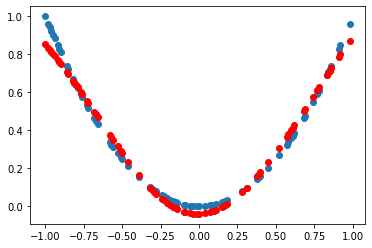

In [ ]:
plt.scatter(test_x,test_y)
plt.scatter(test_x,y_,color='r')
plt.savefig("base_result.png")

from IPython.display import Image
display(Image("base_result.png"))

## 학습 시간 출력
학습에 걸린 시간 출력

In [ ]:
# time 함수 사용
import time

print(time.time())

1640068179.2764764


elapsed : 20.72728395462036
3/3 [==============================] - 0s 4ms/step - loss: 0.0019 - mae: 0.0327
loss= 0.001929713413119316
mae= 0.032721810042858124


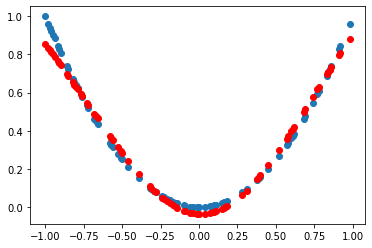

In [ ]:
model = keras.Sequential()
model.add(Input(1))
model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))


model.compile(optimizer="SGD", loss="mse", metrics=["mae"])

# 시작시간 저장
start_time = time.time() 
model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)
# 학습 끝난시간에서 시작시간 빼줌
print("elapsed : {}".format(time.time() - start_time))  
    

loss, mae = model.evaluate(test_x, test_y)
print("loss=", loss)
print("mae=", mae)


y_ = model.predict(test_x)

plt.scatter(test_x,test_y)
plt.scatter(test_x,y_,color='r')
plt.show()

## model.summary() 네트워크 모양 보기
- Layer(type)
: 레이어 이름, 타입. 
(이름 직접 지정 원할때는 Dense에 name=""으로 지정)
- Output Shape
: (None, n) -> (행, 아웃풋 값). 
None인 이유, 딥러닝에서는 데이터 개수가 계속 추가 될수있기 때문에 행을 무시하고 열의 shape 맞춤
- Param
: 파라미터 수, 입력노드 출력노드 간 연결된 수. 
간선이 설정한 모델보다 많이 나오는 이유는 인풋에 바이어스가 추가 되기 때문
(input (n)+ bias (1) = (n+1)개 인풋노드)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 10)                20        
                                                                 
 dense_13 (Dense)            (None, 10)                110       
                                                                 
 dense_14 (Dense)            (None, 1)                 11        
                                                                 
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
elapsed : 20.712072134017944


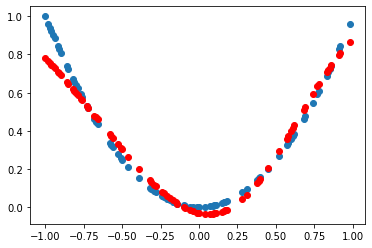

In [ ]:
model = keras.Sequential()
model.add(Input(1))
model.add(Dense(10, activation='tanh')) 
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))


model.compile(optimizer="SGD", loss="mse", metrics=["mae"])
# 네트워크 확인
model.summary() 

start_time = time.time()
model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)
print("elapsed : {}".format(time.time() - start_time))

y_ = model.predict(test_x)

plt.scatter(test_x,test_y)
plt.scatter(test_x,y_,color='r')
plt.show()

# Keras DNN Template
DNN 기본 코드

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 10)                20        
                                                                 
 dense_16 (Dense)            (None, 10)                110       
                                                                 
 dense_17 (Dense)            (None, 1)                 11        
                                                                 
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
elapsed : 9.89255428314209
3/3 [==============================] - 0s 4ms/step - loss: 0.0048 - mae: 0.0547
loss= 0.004757254384458065
mae= 0.05474333092570305


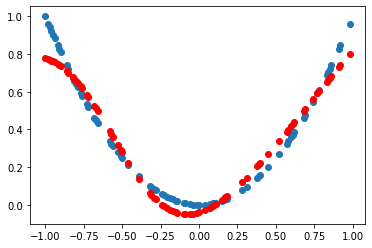

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense, Input

import time


# 모델 정의
model = keras.Sequential()
model.add(Input(1))
model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))


# 모델 컴파일
model.compile(optimizer="SGD", loss="mse", metrics=["mae"])
model.summary()


# 학습
start_time = time.time()
model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)
print("elapsed : {}".format(time.time() - start_time))


# 평가
loss, mae = model.evaluate(test_x, test_y)
print("loss=", loss)
print("mae=", mae)


# 예측
y_ = model.predict(test_x)

plt.scatter(test_x,test_y)
plt.scatter(test_x,y_,color='r')
plt.show()

## layer 수
보통 하나만 씀 (많을수로 시간이 많이걸림)


히든레이어 없을 때

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________
elapsed : 8.976999282836914
3/3 [==============================] - 0s 4ms/step - loss: 0.1176 - mae: 0.2877
loss= 0.11763504892587662
mae= 0.28766000270843506


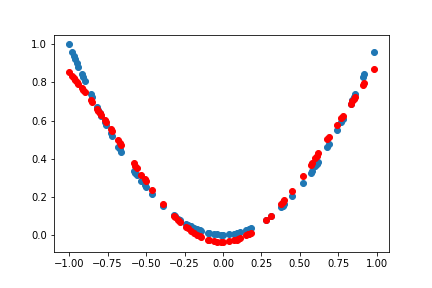

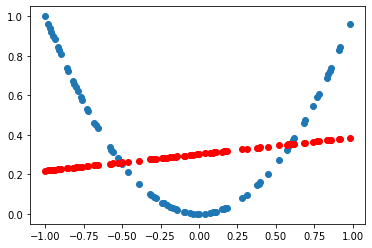

In [ ]:
from tensorflow.keras.layers import Input

model = keras.Sequential()
model.add(Input(1))
# model.add(Dense(10, activation='tanh'))
# model.add(Dense(10, activation='tanh'))
model.add(Dense(1))


model.compile(optimizer="SGD", loss="mse", metrics=["mae"])
model.summary()


start_time = time.time()
model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)
print("elapsed : {}".format(time.time() - start_time))    


loss, mae = model.evaluate(test_x, test_y)
print("loss=", loss)
print("mae=", mae)


# base 모델의 결과
display(Image("base_result.png")) # ADD

y_ = model.predict(test_x)

plt.scatter(test_x,test_y)
plt.scatter(test_x,y_,color='r')
plt.show()

히든 레이어 없으면 학습되지않음

히든 레이어를 1개만


Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_19 (Dense)            (None, 10)                20        
                                                                 
 dense_20 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________
elapsed : 10.45665431022644
3/3 [==============================] - 0s 3ms/step - loss: 0.0056 - mae: 0.0498
loss= 0.0055535840801894665
mae= 0.0498458631336689


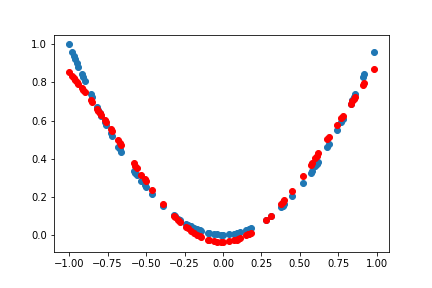

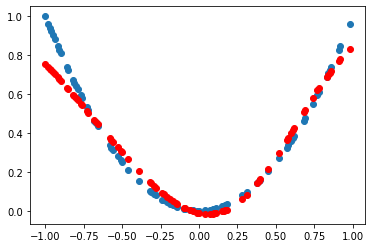

In [ ]:
model = keras.Sequential()
model.add(Input(1))
model.add(Dense(10, activation='tanh'))
# model.add(Dense(10, activation='tanh'))
model.add(Dense(1))


model.compile(optimizer="SGD", loss="mse", metrics=["mae"])
model.summary()


start_time = time.time()
model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)
print("elapsed : {}".format(time.time() - start_time))    


loss, mae = model.evaluate(test_x, test_y)
print("loss=", loss)
print("mae=", mae)


# base 모델의 결과
display(Image("base_result.png")) # ADD

y_ = model.predict(test_x)

plt.scatter(test_x,test_y)
plt.scatter(test_x,y_,color='r')
plt.show()

히든 레이어를 3개로

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 10)                20        
                                                                 
 dense_22 (Dense)            (None, 10)                110       
                                                                 
 dense_23 (Dense)            (None, 10)                110       
                                                                 
 dense_24 (Dense)            (None, 1)                 11        
                                                                 
Total params: 251
Trainable params: 251
Non-trainable params: 0
_________________________________________________________________
elapsed : 10.530264854431152
3/3 [==============================] - 0s 4ms/step - loss: 0.0036 - mae: 0.0438
loss= 0.0036110635846853256
mae= 0.043777335435152054


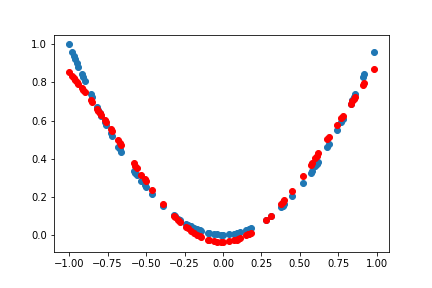

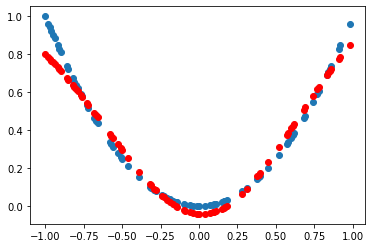

In [ ]:
model = keras.Sequential()
model.add(Input(1))
model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='tanh')) # ADD
model.add(Dense(1))


model.compile(optimizer="SGD", loss="mse", metrics=["mae"])
model.summary()


start_time = time.time()
model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)
print("elapsed : {}".format(time.time() - start_time))    


loss, mae = model.evaluate(test_x, test_y)
print("loss=", loss)
print("mae=", mae)


display(Image("base_result.png"))

y_ = model.predict(test_x)

plt.scatter(test_x,test_y)
plt.scatter(test_x,y_,color='r')
plt.show()

1개와 별차이없음

히든 레이어를 5개로

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_25 (Dense)            (None, 10)                20        
                                                                 
 dense_26 (Dense)            (None, 10)                110       
                                                                 
 dense_27 (Dense)            (None, 10)                110       
                                                                 
 dense_28 (Dense)            (None, 10)                110       
                                                                 
 dense_29 (Dense)            (None, 10)                110       
                                                                 
 dense_30 (Dense)            (None, 1)                 11        
                                                                 
Total params: 471
Trainable params: 471
Non-trainable 

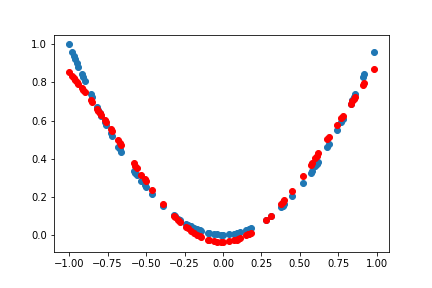

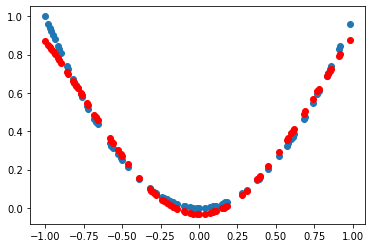

In [ ]:
model = keras.Sequential()
model.add(Input(1))
model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='tanh')) # ADD
model.add(Dense(10, activation='tanh')) # ADD
model.add(Dense(10, activation='tanh')) # ADD
model.add(Dense(1))


model.compile(optimizer="SGD", loss="mse", metrics=["mae"])
model.summary()


start_time = time.time()
model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)
print("elapsed : {}".format(time.time() - start_time))    


loss, mae = model.evaluate(test_x, test_y)
print("loss=", loss)
print("mae=", mae)


display(Image("base_result.png"))

y_ = model.predict(test_x)

plt.scatter(test_x,test_y)
plt.scatter(test_x,y_,color='r')
plt.show()

히든 레이어를 10개로

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_31 (Dense)            (None, 10)                20        
                                                                 
 dense_32 (Dense)            (None, 10)                110       
                                                                 
 dense_33 (Dense)            (None, 10)                110       
                                                                 
 dense_34 (Dense)            (None, 10)                110       
                                                                 
 dense_35 (Dense)            (None, 10)                110       
                                                                 
 dense_36 (Dense)            (None, 10)                110       
                                                                 
 dense_37 (Dense)            (None, 10)              

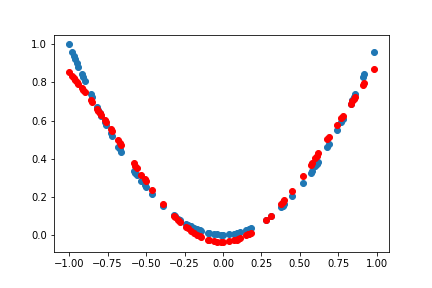

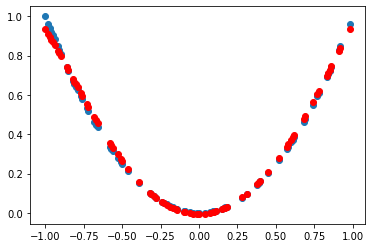

In [ ]:
model = keras.Sequential()
model.add(Input(1))
model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='tanh')) # ADD
model.add(Dense(10, activation='tanh')) # ADD
model.add(Dense(10, activation='tanh')) # ADD
model.add(Dense(10, activation='tanh')) # ADD
model.add(Dense(10, activation='tanh')) # ADD
model.add(Dense(10, activation='tanh')) # ADD
model.add(Dense(10, activation='tanh')) # ADD
model.add(Dense(10, activation='tanh')) # ADD
model.add(Dense(1))


model.compile(optimizer="SGD", loss="mse", metrics=["mae"])
model.summary()


start_time = time.time()
model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)
print("elapsed : {}".format(time.time() - start_time))    


loss, mae = model.evaluate(test_x, test_y)
print("loss=", loss)
print("mae=", mae)


display(Image("base_result.png"))

y_ = model.predict(test_x)

plt.scatter(test_x,test_y)
plt.scatter(test_x,y_,color='r')
plt.show()

10개로 늘리자 좋아진것으로 보임

## node 수

node 수를 작게

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_42 (Dense)            (None, 5)                 10        
                                                                 
 dense_43 (Dense)            (None, 5)                 30        
                                                                 
 dense_44 (Dense)            (None, 1)                 6         
                                                                 
Total params: 46
Trainable params: 46
Non-trainable params: 0
_________________________________________________________________
elapsed : 9.886491060256958
3/3 [==============================] - 0s 4ms/step - loss: 0.0018 - mae: 0.0334
loss= 0.0018255391623824835
mae= 0.033405669033527374


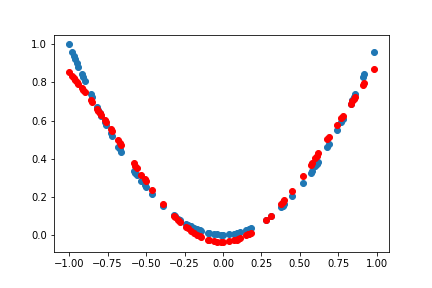

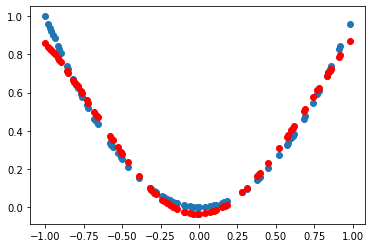

In [ ]:
model = keras.Sequential()
model.add(Input(1))
# model.add(Dense(10, activation='tanh'))
# model.add(Dense(10, activation='tanh'))
model.add(Dense(5, activation='tanh'))
model.add(Dense(5, activation='tanh'))
model.add(Dense(1))


model.compile(optimizer="SGD", loss="mse", metrics=["mae"])
model.summary()


start_time = time.time()
model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)
print("elapsed : {}".format(time.time() - start_time))    


loss, mae = model.evaluate(test_x, test_y)
print("loss=", loss)
print("mae=", mae)


display(Image("base_result.png"))

y_ = model.predict(test_x)

plt.scatter(test_x,test_y)
plt.scatter(test_x,y_,color='r')
plt.show()

노드 5개의 경우 살짝 차이남

노드 수를 아주 작게 (2개)

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_45 (Dense)            (None, 2)                 4         
                                                                 
 dense_46 (Dense)            (None, 2)                 6         
                                                                 
 dense_47 (Dense)            (None, 1)                 3         
                                                                 
Total params: 13
Trainable params: 13
Non-trainable params: 0
_________________________________________________________________
elapsed : 10.48014235496521
3/3 [==============================] - 0s 4ms/step - loss: 0.0063 - mae: 0.0591
loss= 0.006349633447825909
mae= 0.05910531431436539


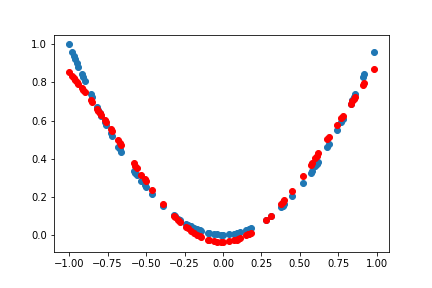

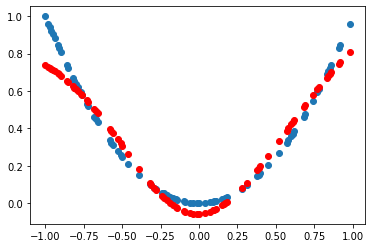

In [ ]:
model = keras.Sequential()
model.add(Input(1))
# model.add(Dense(10, activation='tanh'))
# model.add(Dense(10, activation='tanh'))
model.add(Dense(2, activation='tanh'))
model.add(Dense(2, activation='tanh'))
model.add(Dense(1))


model.compile(optimizer="SGD", loss="mse", metrics=["mae"])
model.summary()


start_time = time.time()
model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)
print("elapsed : {}".format(time.time() - start_time))    


loss, mae = model.evaluate(test_x, test_y)
print("loss=", loss)
print("mae=", mae)


display(Image("base_result.png"))

y_ = model.predict(test_x)

plt.scatter(test_x,test_y)
plt.scatter(test_x,y_,color='r')
plt.show()

노드 2개의 경우 차이가 큼

노드 수가 1개

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_48 (Dense)            (None, 1)                 2         
                                                                 
 dense_49 (Dense)            (None, 1)                 2         
                                                                 
 dense_50 (Dense)            (None, 1)                 2         
                                                                 
Total params: 6
Trainable params: 6
Non-trainable params: 0
_________________________________________________________________
elapsed : 10.489872932434082
3/3 [==============================] - 0s 4ms/step - loss: 0.1186 - mae: 0.2865
loss= 0.11857476085424423
mae= 0.28653886914253235


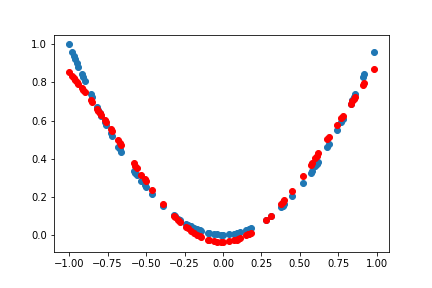

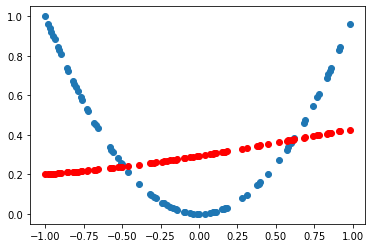

In [ ]:
model = keras.Sequential()
model.add(Input(1))
# model.add(Dense(10, activation='tanh'))
# model.add(Dense(10, activation='tanh'))
model.add(Dense(1, activation='tanh'))
model.add(Dense(1, activation='tanh'))
model.add(Dense(1))


model.compile(optimizer="SGD", loss="mse", metrics=["mae"])
model.summary()


start_time = time.time()
model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)
print("elapsed : {}".format(time.time() - start_time))    


loss, mae = model.evaluate(test_x, test_y)
print("loss=", loss)
print("mae=", mae)


display(Image("base_result.png"))

y_ = model.predict(test_x)

plt.scatter(test_x,test_y)
plt.scatter(test_x,y_,color='r')
plt.show()

거의 학습되지않음

## sin 데이터

In [ ]:
def get_sin_data(start=0, end=10, step=0.1):
  x = np.arange(start,end,step)
  np.random.shuffle(x)
  y = np.sin(x)

  split_index = int(x.shape[0]*0.6)

  train_x, test_x = x[:split_index], x[split_index:]
  train_y, test_y = y[:split_index], y[split_index:]

  return (train_x, train_y), (test_x, test_y)

### 학습 추가 진행
모델은 그대로 두고 데이터만 sin 데이터로 변경

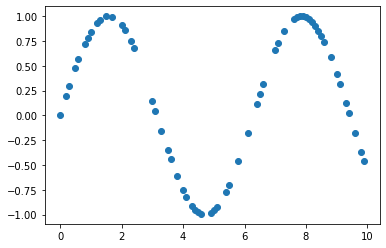

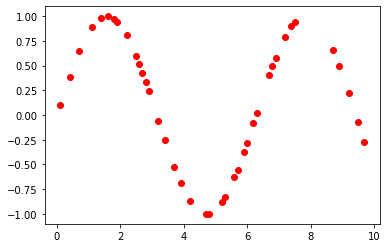

In [ ]:
(train_x, train_y), (test_x, test_y) = get_sin_data(start=0, end=10, step=0.1)

plt.scatter(train_x,train_y)
plt.show()

plt.scatter(test_x,test_y,color="r")
plt.show()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_51 (Dense)            (None, 10)                20        
                                                                 
 dense_52 (Dense)            (None, 10)                110       
                                                                 
 dense_53 (Dense)            (None, 1)                 11        
                                                                 
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
elapsed : 10.484612941741943
2/2 [==============================] - 0s 6ms/step - loss: 0.1221 - mae: 0.2620
loss= 0.1220802515745163
mae= 0.2620387673377991


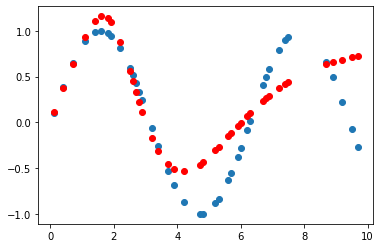

In [ ]:
model = keras.Sequential()
model.add(Input(1))
model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))


model.compile(optimizer="SGD", loss="mse", metrics=["mae"])
model.summary()


start_time = time.time()
model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)
print("elapsed : {}".format(time.time() - start_time))    


loss, mae = model.evaluate(test_x, test_y)
print("loss=", loss)
print("mae=", mae)


y_ = model.predict(test_x)

plt.scatter(test_x,test_y)
plt.scatter(test_x,y_,color='r')
plt.show()

학습이 충분히 되지 않아보임

### 추가 학습

In [ ]:
def fit_one_more(model, train_x, train_y, test_x, test_y, batch_size=20):

  start_time = time.time()
  model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=batch_size)
  print("elapsed : {}".format(time.time() - start_time))    

  y_ = model.predict(test_x)

  plt.scatter(test_x,test_y)
  plt.scatter(test_x,y_,color='r')
  plt.show()

def fit_n_times(model, train_x, train_y, test_x, test_y, n):
  
  for i in range(n):
    print("{} times fitting".format(i))
    fit_one_more(model, train_x, train_y, test_x, test_y)

0 times fitting
elapsed : 10.267327070236206


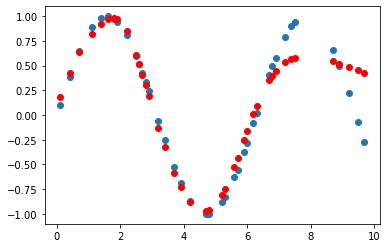

1 times fitting
elapsed : 5.731749057769775


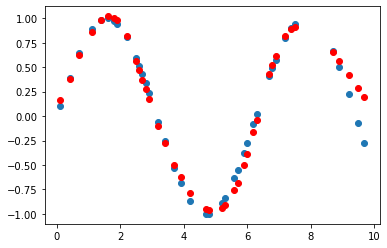

2 times fitting
elapsed : 10.263370513916016


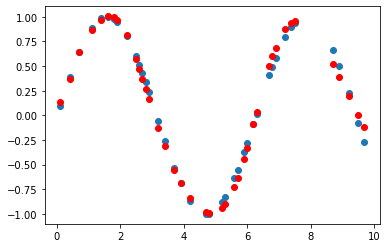

3 times fitting
elapsed : 5.713969469070435


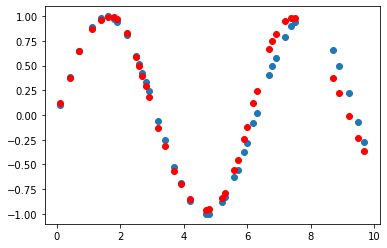

4 times fitting
elapsed : 5.690666913986206


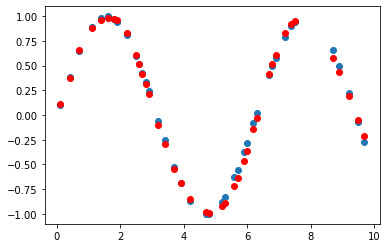

5 times fitting
elapsed : 10.264399528503418


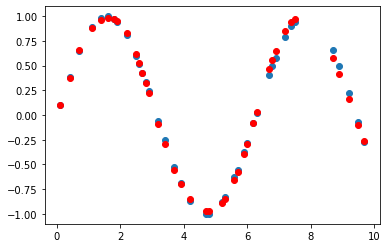

6 times fitting
elapsed : 10.262588500976562


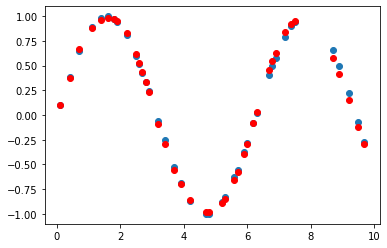

7 times fitting
elapsed : 5.797946929931641


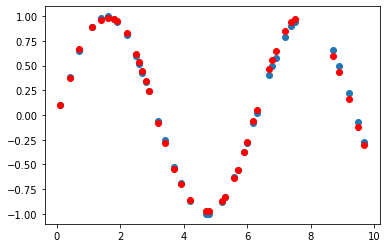

8 times fitting
elapsed : 5.760742902755737


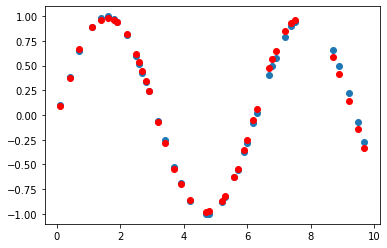

9 times fitting
elapsed : 10.263579368591309


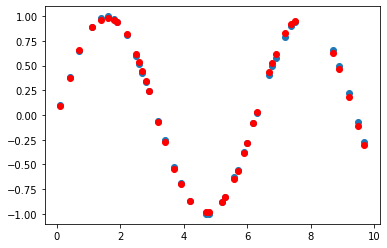

In [ ]:
fit_n_times(model, train_x, train_y, test_x, test_y, 10)

학습이 진행되면서 거의 완벽하게 학습

model.fit()의 batch_size
batch_size는 GPU와 관련된 옵션이다.

한번에 GPU에 보내는 데이터의 수이다.



batch_size가 1일 경우 1개를 보내고, 1개의 결과를 받고, 1번 웨이트를 업데이트 한다.

batch_size가 10일 경우 10개를 보내고, 10개의 결과를 한 번에 받고, 1번 웨이트를 업데이트 한다.



GPU는 보통 수천개의 코어를 가지고 있다. 동시에 꽤 많은 연산을 처리할 수 있다. 그런데 데이터가 적으면 대부분은 사용하지 못하고 일부만 연산에 사용된다.

복수의 데이터를 한번에 보내어 한번에 연산을 할수 있고, 그 결과를 반환할 수 있다. 이런 방법으로 연산 시간을 줄일 수 있다.



하지만, 복수의 데이터를 한번에 보내는 경우 한번에 보낸 결과가 한번에 오고 1번 업데이트 되면서 업데이트 되는 사항이 뭉개지는 단점이 있다.

In [ ]:
def build_model():

  model = keras.Sequential()
  model.add(Input(1))
  model.add(Dense(10, activation='tanh'))
  model.add(Dense(10, activation='tanh'))
  model.add(Dense(1))

  model.compile(optimizer="SGD", loss="mse", metrics=["mae"])

  return model

def fit_with_batch_sizes(train_x, train_y, test_x, test_y, batch_sizes):

  for batch_size in batch_sizes:
    model = build_model()
    print("batch_size={}".format(batch_size))
    fit_one_more(model, train_x, train_y, test_x, test_y, batch_size)

In [ ]:
(train_x, train_y), (test_x, test_y) = get_sin_data(start=0, end=10, step=0.1)

batch_size 적용 : [1,2,5,10,20,50,100,200,500]

batch_size=1
elapsed : 77.91823482513428


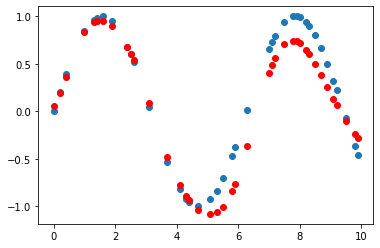

batch_size=2
elapsed : 41.197187185287476


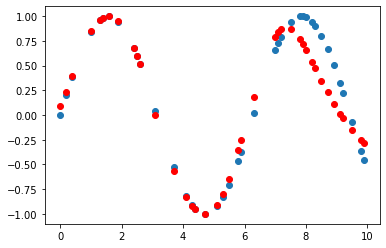

batch_size=5
elapsed : 17.532880306243896


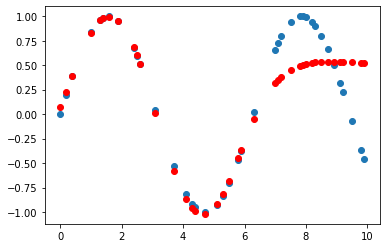

batch_size=10
elapsed : 10.489190101623535


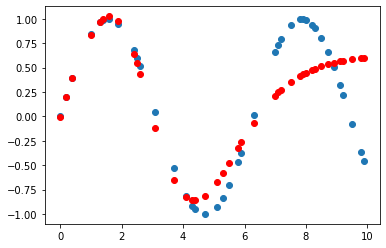

batch_size=20
elapsed : 5.9943764209747314


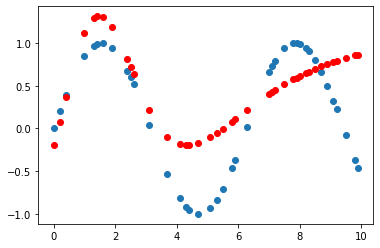

batch_size=50
elapsed : 5.562183141708374


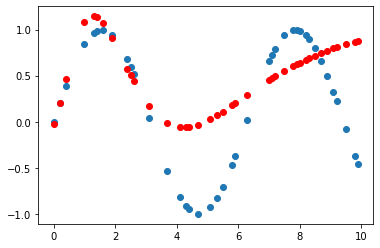

batch_size=100
elapsed : 5.393403053283691


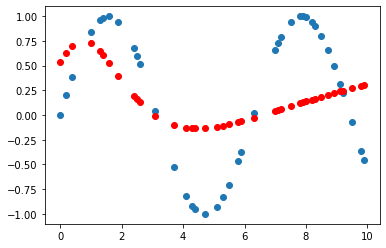

batch_size=200
elapsed : 3.776768207550049


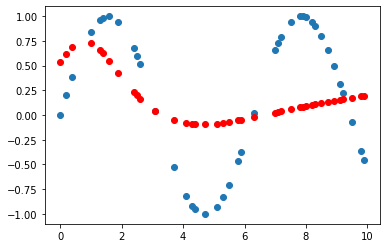

batch_size=500
elapsed : 3.8957977294921875


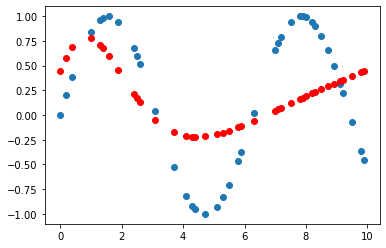

In [ ]:
fit_with_batch_sizes(train_x, train_y, test_x, test_y, batch_sizes=[1,2,5,10,20,50,100,200,500])

batch_size를 키우면, 시간은 줄어들지만 학습이 빠르게 진행되지 않음

model.fit() verbose
- 0 : 진행하면서 아무런 출력 없이
- 1 : 진행하면서 출력과 같이

In [ ]:
# (train_x, train_y), (test_x, test_y) = get_sin_data(start=0, end=10, step=0.01)
(train_x, train_y), (test_x, test_y) = get_sin_data(start=0, end=10, step=0.0001)

model = keras.Sequential()
model.add(Input(1))
model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))


model.compile(optimizer="SGD", loss="mse", metrics=["mae"])
model.summary()

print(train_x.shape)

start_time = time.time()
# model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)
model.fit(train_x, train_y, epochs=5, verbose=1, batch_size=20)
print("elapsed : {}".format(time.time() - start_time))   

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_81 (Dense)            (None, 10)                20        
                                                                 
 dense_82 (Dense)            (None, 10)                110       
                                                                 
 dense_83 (Dense)            (None, 1)                 11        
                                                                 
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
(60000,)
Epoch 1/5
3000/3000 [==============================] - 6s 2ms/step - loss: 0.2531 - mae: 0.4157
Epoch 2/5
3000/3000 [==============================] - 5s 2ms/step - loss: 0.1231 - mae: 0.2451
Epoch 3/5
3000/3000 [==============================] - 5s 2ms/step - loss: 0.0872 - mae: 0.1946
Epoch 4/5
3000/3000 [=

- loss 작아지는것은 학습이 진행되고 있음을 의미
- mean absolute error(mae) : 실제 값과 예측 값의 차이(Error)를 절대값으로 변환해 평균화 

### loss 보기

In [ ]:
(train_x, train_y), (test_x, test_y) = get_sin_data(start=0, end=10, step=0.1)

model = keras.Sequential()
model.add(Input(1))
model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))


model.compile(optimizer="SGD", loss="mse", metrics=["mae"])
model.summary()


start_time = time.time()
hist = model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)
print("elapsed : {}".format(time.time() - start_time)) 

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_84 (Dense)            (None, 10)                20        
                                                                 
 dense_85 (Dense)            (None, 10)                110       
                                                                 
 dense_86 (Dense)            (None, 1)                 11        
                                                                 
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
elapsed : 10.480960607528687


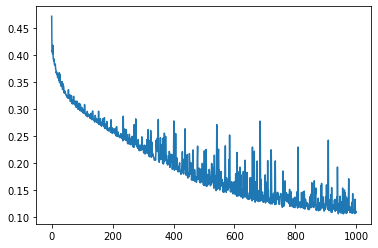

In [ ]:
plt.plot(hist.history['loss'])
plt.show()

In [ ]:
print(hist.history)

{'loss': [0.47212788462638855, 0.40744534134864807, 0.40847840905189514, 0.4026036858558655, 0.4182533025741577, 0.39478829503059387, 0.39146408438682556, 0.3887893557548523, 0.39297229051589966, 0.38314083218574524, 0.3816084563732147, 0.38371381163597107, 0.38345521688461304, 0.37426260113716125, 0.37284642457962036, 0.36703792214393616, 0.36945968866348267, 0.36452797055244446, 0.36652252078056335, 0.3598565459251404, 0.35817548632621765, 0.36467838287353516, 0.3577256500720978, 0.35941794514656067, 0.3532543182373047, 0.36752745509147644, 0.3493170738220215, 0.36473920941352844, 0.35142582654953003, 0.3506316542625427, 0.34270521998405457, 0.34623488783836365, 0.344014048576355, 0.3437265157699585, 0.3509625792503357, 0.33897146582603455, 0.3362508714199066, 0.3470851182937622, 0.3406316637992859, 0.34267061948776245, 0.33675816655158997, 0.33003026247024536, 0.33438554406166077, 0.3304150402545929, 0.332550048828125, 0.3288605809211731, 0.3284572660923004, 0.32673177123069763, 0.3

## 학습 시에 validation
### model.fit()의 validation_data

In [ ]:
(train_x, train_y), (test_x, test_y) = get_sin_data(start=0, end=10, step=0.1)

model = keras.Sequential()
model.add(Input(1))
model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))


model.compile(optimizer="SGD", loss="mse", metrics=["mae"])
model.summary()


start_time = time.time()
# model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)
hist = model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20, validation_data=(test_x, test_y))
print("elapsed : {}".format(time.time() - start_time))    

Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_87 (Dense)            (None, 10)                20        
                                                                 
 dense_88 (Dense)            (None, 10)                110       
                                                                 
 dense_89 (Dense)            (None, 1)                 11        
                                                                 
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
elapsed : 22.008985996246338


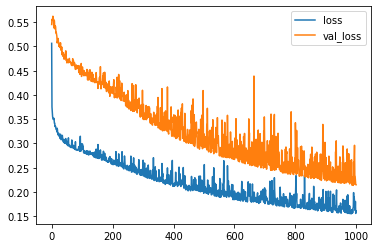

In [ ]:
plt.plot(hist.history['loss'], label='loss')
plt.plot(hist.history['val_loss'], label='val_loss')
plt.legend()

loss는 낮아지는게 좋음

### model.fit()의 validation_split
따로 validation 데이터를 주지 않고, test 데이터로 준 것의 일부를 validation에 사용.

validation에 사용된 데이터는 학습에 사용되지 않는다.

In [ ]:
(train_x, train_y), (test_x, test_y) = get_sin_data(start=0, end=10, step=0.1)

model = keras.Sequential()
model.add(Input(1))
model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))


model.compile(optimizer="SGD", loss="mse", metrics=["mae"])
model.summary()


start_time = time.time()
# model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)
hist = model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20, validation_split=0.1)
print("elapsed : {}".format(time.time() - start_time)) 

Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_90 (Dense)            (None, 10)                20        
                                                                 
 dense_91 (Dense)            (None, 10)                110       
                                                                 
 dense_92 (Dense)            (None, 1)                 11        
                                                                 
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
elapsed : 22.97991681098938


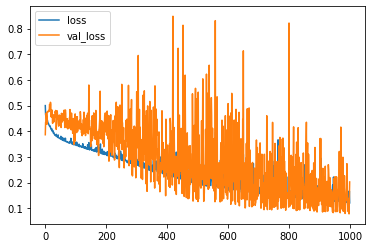

In [ ]:
plt.plot(hist.history['loss'], label='loss')
plt.plot(hist.history['val_loss'], label='val_loss')
plt.legend()

## 데이터 크기와 epoch 수

In [ ]:
# (train_x, train_y), (test_x, test_y) = get_sin_data(start=0, end=10, step=0.01)
(train_x, train_y), (test_x, test_y) = get_sin_data(start=0, end=10, step=0.0001)

model = keras.Sequential()
model.add(Input(1))
model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))


model.compile(optimizer="SGD", loss="mse", metrics=["mae"])
model.summary()

start_time = time.time()
# model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)
model.fit(train_x, train_y, epochs=5, verbose=2, batch_size=20)
print("elapsed : {}".format(time.time() - start_time))    

Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_93 (Dense)            (None, 10)                20        
                                                                 
 dense_94 (Dense)            (None, 10)                110       
                                                                 
 dense_95 (Dense)            (None, 1)                 11        
                                                                 
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
3000/3000 - 4s - loss: 0.2492 - mae: 0.4089 - 4s/epoch - 1ms/step
Epoch 2/5
3000/3000 - 4s - loss: 0.0963 - mae: 0.2121 - 4s/epoch - 1ms/step
Epoch 3/5
3000/3000 - 4s - loss: 0.0550 - mae: 0.1551 - 4s/epoch - 1ms/step
Epoch 4/5
3000/3000 - 4s - loss: 0.0329 - mae: 0.1151 - 4s/epoch - 1ms/step
Epoch 5/5
3000/

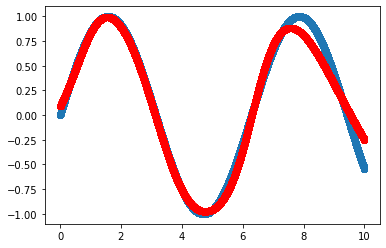

In [ ]:
y_ = model.predict(test_x)

plt.scatter(test_x,test_y)
plt.scatter(test_x,y_,color='r')
plt.show()

train_x의 데이터 수가 6000개. epoch는 5. 총 30,000번 업데이트 되었다.

epoch가 적어도 데이터 수가 많으면 학습 잘된다.

## Shuffle
- 전체 데이터 준비 할 때

60


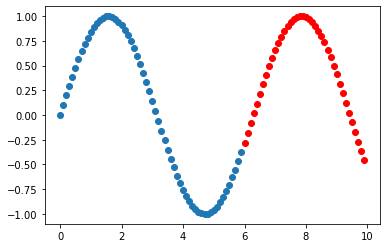

In [ ]:
x = np.arange(0,10,0.1)
# np.random.shuffle(x) # COMMENTED
y = np.sin(x)

split_index = int(x.shape[0]*0.6)
print(split_index)

train_x, test_x = x[:split_index], x[split_index:]
train_y, test_y = y[:split_index], y[split_index:]

plt.scatter(train_x, train_y)
plt.scatter(test_x, test_y, color="r")

Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_96 (Dense)            (None, 10)                20        
                                                                 
 dense_97 (Dense)            (None, 10)                110       
                                                                 
 dense_98 (Dense)            (None, 1)                 11        
                                                                 
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________


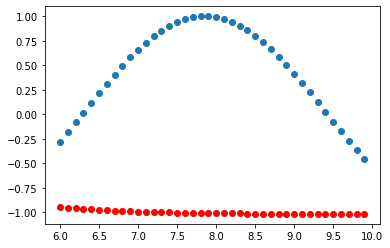

In [ ]:
model = keras.Sequential()
model.add(Input(1))
model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))


model.compile(optimizer="SGD", loss="mse", metrics=["mae"])
model.summary()

model.fit(train_x, train_y, epochs=2000, verbose=0, batch_size=20)

y_ = model.predict(test_x)

plt.scatter(test_x,test_y) # 정답
plt.scatter(test_x,y_,color='r') # 예측값
plt.show()

train 데이터와 test 데이터가 서로 떨어져 있다.

train 영역의 데이터로 학습된 모델은 test 영역의 데이터에 적용하지 못한다.

전체데이터를 잘 섞어 주고, 이를 train, test로 나누어야 한다.

60


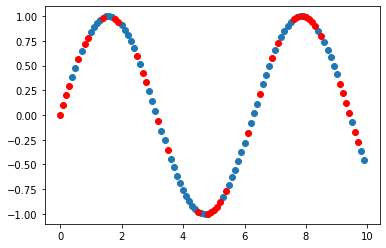

In [ ]:
x = np.arange(0,10,0.1)
np.random.shuffle(x) # UNCOMMENT
y = np.sin(x)

split_index = int(x.shape[0]*0.6)
print(split_index)

train_x, test_x = x[:split_index], x[split_index:]
train_y, test_y = y[:split_index], y[split_index:]

plt.scatter(train_x, train_y)
plt.scatter(test_x, test_y, color="r")

Model: "sequential_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_99 (Dense)            (None, 10)                20        
                                                                 
 dense_100 (Dense)           (None, 10)                110       
                                                                 
 dense_101 (Dense)           (None, 1)                 11        
                                                                 
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________


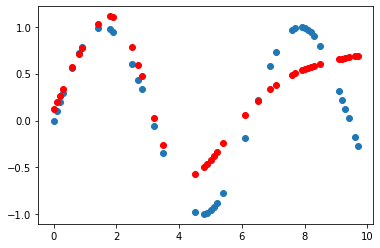

In [ ]:
model = keras.Sequential()
model.add(Input(1))
model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))


model.compile(optimizer="SGD", loss="mse", metrics=["mae"])
model.summary()

model.fit(train_x, train_y, epochs=2000, verbose=0, batch_size=20)

y_ = model.predict(test_x)

plt.scatter(test_x,test_y)
plt.scatter(test_x,y_,color='r')
plt.show()

### 데이터 쌍 유지하면서 섞기

In [ ]:
x = np.arange(0,10,0.1)
y = x

indexes = np.arange(len(x))
print(indexes)
np.random.shuffle(indexes)
print(indexes)

print(x[:10])
print(y[:10])

x = x[indexes]
y = y[indexes]

print(x[:10])
print(y[:10])

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99]
[66 74 14 94 89 56  4 79 29 95 47 68 16 57 62 33 76 93 28 51 53 49 61 34
 43 26 15  8 72 23 88 96 48 71 40 11 45 77 73  6 19 24 97 65 21  3 85 86
  2 63 83 32 80 20 82 30 50 92  0 87 64 98 37 54 67  5  1 99 22 84 41 55
 91 44 69 35 81 78 75 13 52 58 59 46 25 12 90 18 17 10 39 70 36 60  9 31
  7 42 38 27]
[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]
[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]
[6.6 7.4 1.4 9.4 8.9 5.6 0.4 7.9 2.9 9.5]
[6.6 7.4 1.4 9.4 8.9 5.6 0.4 7.9 2.9 9.5]


### 데이터 섞는 이유
학습 시에 데이터를 섞어 주지 않으면 특정 데이터 순서로 학습이 일어나 편향이 생길 수있다.

In [ ]:
(train_x, train_y), (test_x, test_y) = get_sin_data(start=0, end=10, step=0.01)

Model: "sequential_31"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_102 (Dense)           (None, 10)                20        
                                                                 
 dense_103 (Dense)           (None, 10)                110       
                                                                 
 dense_104 (Dense)           (None, 1)                 11        
                                                                 
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
elapsed : 2.7913434505462646


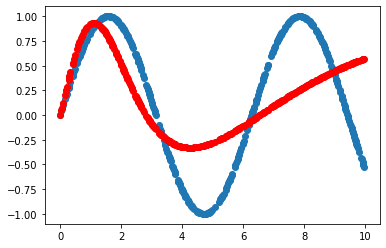

In [ ]:
model = keras.Sequential()
model.add(Input(1))
model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))


model.compile(optimizer="SGD", loss="mse", metrics=["mae"])
model.summary()

start_time = time.time()
model.fit(train_x, train_y, epochs=50, verbose=0, batch_size=20)
print("elapsed : {}".format(time.time() - start_time)) 

y_ = model.predict(test_x)

plt.scatter(test_x,test_y)
plt.scatter(test_x,y_,color='r')
plt.show()

Model: "sequential_32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_105 (Dense)           (None, 10)                20        
                                                                 
 dense_106 (Dense)           (None, 10)                110       
                                                                 
 dense_107 (Dense)           (None, 1)                 11        
                                                                 
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
elapsed : 2.324371814727783


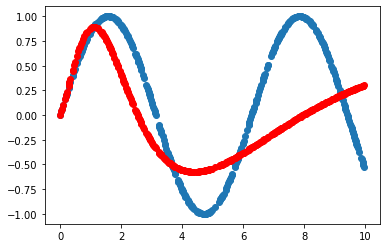

In [ ]:
model = keras.Sequential()
model.add(Input(1))
model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))


model.compile(optimizer="SGD", loss="mse", metrics=["mae"])
model.summary()

start_time = time.time()
# model.fit(train_x, train_y, epochs=50, verbose=0, batch_size=20)
model.fit(train_x, train_y, epochs=50, verbose=0, batch_size=20, shuffle=True)  # 디폴트 값이 True임
print("elapsed : {}".format(time.time() - start_time)) 

y_ = model.predict(test_x)

plt.scatter(test_x,test_y)
plt.scatter(test_x,y_,color='r')
plt.show()

각 epoch마다 섞어 주는게 중요

shuffle 파라매터의 디펄트 값은 True로, Keras의 model.fit() 호출시에는 따로 설정하지 않아도 됨

# 모델 저장과 로딩

Model: "sequential_33"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_108 (Dense)           (None, 10)                20        
                                                                 
 dense_109 (Dense)           (None, 10)                110       
                                                                 
 dense_110 (Dense)           (None, 1)                 11        
                                                                 
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
elapsed : 10.471152544021606
2/2 [==============================] - 0s 10ms/step - loss: 0.1545 - mae: 0.3014
loss= 0.1545325666666031
mae= 0.30136650800704956


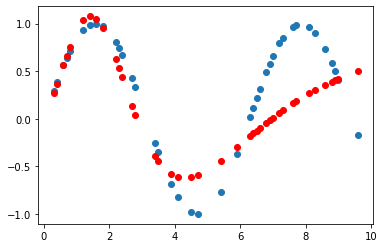

In [ ]:
(train_x, train_y), (test_x, test_y) = get_sin_data(start=0, end=10, step=0.1)

model = keras.Sequential()
model.add(Input(1))
model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))


model.compile(optimizer="SGD", loss="mse", metrics=["mae"])
model.summary()


start_time = time.time()
model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)
print("elapsed : {}".format(time.time() - start_time))    


loss, mae = model.evaluate(test_x, test_y)
print("loss=", loss)
print("mae=", mae)


y_ = model.predict(test_x)

plt.scatter(test_x,test_y)
plt.scatter(test_x,y_,color='r')
plt.show()

## 모델 저장

In [ ]:
# .h5 붙으면 케라스 저장
model.save('my_model.h5')

!ls -al

total 52
drwxr-xr-x 1 root root  4096 Dec 21 06:39 .
drwxr-xr-x 1 root root  4096 Dec 21 06:11 ..
-rw-r--r-- 1 root root 12133 Dec 21 06:29 base_result.png
drwxr-xr-x 4 root root  4096 Dec  3 14:33 .config
-rw-r--r-- 1 root root 20736 Dec 21 06:39 my_model.h5
drwxr-xr-x 1 root root  4096 Dec  3 14:33 sample_data


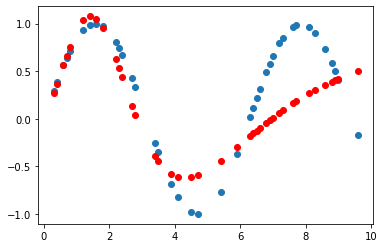

In [ ]:
# 모델 로딩
from tensorflow import keras # 같이 넣어줌
new_model = keras.models.load_model('my_model.h5')

y_ = new_model.predict(test_x)

plt.scatter(test_x,test_y)
plt.scatter(test_x,y_,color='r')
plt.show()

INFO:tensorflow:Assets written to: my_model/assets
total 56
drwxr-xr-x 1 root root  4096 Dec 21 06:39 .
drwxr-xr-x 1 root root  4096 Dec 21 06:11 ..
-rw-r--r-- 1 root root 12133 Dec 21 06:29 base_result.png
drwxr-xr-x 4 root root  4096 Dec  3 14:33 .config
drwxr-xr-x 4 root root  4096 Dec 21 06:39 my_model
-rw-r--r-- 1 root root 20736 Dec 21 06:39 my_model.h5
drwxr-xr-x 1 root root  4096 Dec  3 14:33 sample_data


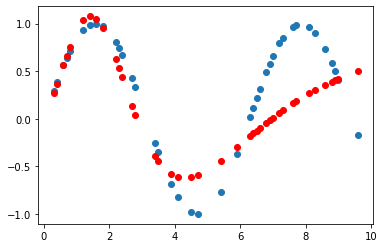

In [ ]:
# .h5안붙이면 폴더로 저장됨 (텐서플로우 저장)
model.save('my_model') 

!ls -al

# 모델 로딩
from tensorflow import keras # 같이 넣어줌
new_model = keras.models.load_model('my_model')

y_ = new_model.predict(test_x)

plt.scatter(test_x,test_y)
plt.scatter(test_x,y_,color='r')
plt.show()

# GPU 사용
따로 명시하지 않아도 default로 GPU를 사용한다.

명시적으로 설정할 수도 있다.

## 리스트 보기

In [ ]:
# GPU 이름조회
from tensorflow.python.client import device_lib
print(tf.test.gpu_device_name())

/device:GPU:0


# NVIDIA GPU 상태 보기

In [ ]:
!nvidia-smi

Tue Dec 21 06:39:12 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.44       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   38C    P0    35W / 250W |    451MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# GPU 설정
다음의 디바이스 이름이 가능

- /device:GPU:0
- /GPU:0
- /gpu:0
- /gpu
- /cpu:0
- /cpu

In [ ]:
(train_x, train_y), (test_x, test_y) = get_sin_data(start=0, end=10, step=0.01)

Model: "sequential_34"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_111 (Dense)           (None, 10)                20        
                                                                 
 dense_112 (Dense)           (None, 10)                110       
                                                                 
 dense_113 (Dense)           (None, 1)                 11        
                                                                 
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
elapsed : 2.3397936820983887


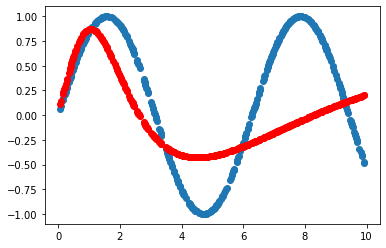

In [ ]:
with tf.device('/device:GPU:0'): # ADDED

  model = keras.Sequential()
  model.add(Input(1))
  model.add(Dense(10, activation='tanh'))
  model.add(Dense(10, activation='tanh'))
  model.add(Dense(1))


  model.compile(optimizer="SGD", loss="mse", metrics=["mae"])
  model.summary()

  start_time = time.time()
  model.fit(train_x, train_y, epochs=50, verbose=0, batch_size=20)
  print("elapsed : {}".format(time.time() - start_time)) 

  y_ = model.predict(test_x)

  plt.scatter(test_x,test_y)
  plt.scatter(test_x,y_,color='r')
  plt.show()